In [56]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# Read the CSV file
df = pd.read_csv('patient-data.csv')

# Get the number of rows and columns
rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

levels = {}
for col in df.columns:
    s = df[col]
    if s.dtype == "O":
        levels[col] = "nominal"
        continue

    x = s.values
    if len(x) == 0:
        levels[col] = "nominal"
        continue

    is_int_like = np.all(np.isclose(x, np.round(x)))

    unique_count = len(np.unique(x))
    mn = float(np.min(x))
    
    if is_int_like and unique_count <= 10:
        levels[col] = "ordinal"
    elif mn<0:
        levels[col] = "interval"
    else:
        levels[col] = "ratio"


for k,v in levels.items():
    print(f"{k}:{v}")

Number of rows: 2371
Number of columns: 25
p01:ratio
p02:ratio
p03:ratio
p04:ratio
p05:ratio
p06:ratio
p07:ratio
p08:ratio
p09:ratio
p10:ratio
p11:ratio
p12:ratio
p13:ratio
p14:ratio
p15:ratio
p16:ratio
p17:ratio
p18:ratio
p19:ratio
p20:ratio
p21:ratio
p22:ratio
p23:ratio
p24:ratio
Ailment:nominal


In [61]:
# Find missing data
missing_data = []
for col in df.columns:
    for i, val in enumerate(df[col].isnull()):
        if val:
            missing_data.append({'row': i, 'column': col})

# Display missing data in a tabular format
if missing_data:
    print("\nMissing data:")
    missing_df = pd.DataFrame(missing_data)
    print(missing_df.to_string(index=False))
else:
    print("\nNo missing data found.")


Missing data:
 row  column
 773     p03
 773     p04
 773     p05
 773     p06
 773     p07
 773     p08
 773     p09
 773     p10
 773     p11
 773     p12
 773     p13
 773     p14
 223     p15
 773     p15
 223     p16
 773     p16
 773     p17
 773     p18
 773     p19
 773     p20
 773     p21
 773     p22
 762 Ailment
 769 Ailment


### Level of Measurement for each column:

*   **Columns 1-24:** Ratio Scale (Numerical data with a true zero)
*   **Column 25 (Ailment):** Nominal Scale (Categorical data with no intrinsic order)

### Level of Measurement for each column:

* **p01 to p24**: These columns contain numeric data which are measurements. This represents a **Ratio Scale** level of measurement, as it has a true zero point and equal intervals between values.
* **Ailment**: This column contains categorical data representing different health conditions. This is a **Nominal Scale** level of measurement, as the categories have no intrinsic order or ranking.

In [62]:
# Descriptive Statistics

# Separate columns by level of measurement
ratio_columns = [col for col in df.columns if col.startswith('p')]
nominal_columns = ['Ailment']

# Descriptive statistics for ratio scale columns
print("Descriptive Statistics for Ratio Scale Columns:")
print(df[ratio_columns].describe())

# Descriptive statistics for nominal scale columns
print("\nDescriptive Statistics for Nominal Scale Columns:")
print(df[nominal_columns].value_counts().to_frame('Frequency'))

Descriptive Statistics for Ratio Scale Columns:
               p01          p02          p03            p04           p05  \
count  2371.000000  2371.000000  2370.000000    2370.000000   2370.000000   
mean     95.723590   157.056068    15.875821  299642.033487   7576.392817   
std      18.391307    20.086634     1.108117   92072.554351   1975.407145   
min      70.000000   125.000000    13.500000  150000.000000   4000.000000   
25%      79.045276   140.428465    14.841100  207236.904200   5779.743222   
50%      94.910515   157.334147    15.976076  308502.921600   7692.153435   
75%     111.766345   172.881629    16.716185  375652.950400   9232.441784   
max     140.000000   200.000000    17.500000  450000.000000  11000.000000   

               p06          p07          p08          p09          p10  ...  \
count  2370.000000  2370.000000  2370.000000  2370.000000  2370.000000  ...   
mean      4.781409    45.176374    89.368838    30.012760    34.288155  ...   
std       0.334514   

In [63]:
def find_outliers(data):
    # Calculate Q1 and Q3
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

for col1 in ratio_columns:
    print(f" {col1} outliers : {find_outliers(df[col1])}");

 p01 outliers : None
 p02 outliers : None
 p03 outliers : None
 p04 outliers : None
 p05 outliers : None
 p06 outliers : None
 p07 outliers : None
 p08 outliers : None
 p09 outliers : None
 p10 outliers : None
 p11 outliers : None
 p12 outliers : None
 p13 outliers : None
 p14 outliers : None
 p15 outliers : None
 p16 outliers : None
 p17 outliers : None
 p18 outliers : None
 p19 outliers : None
 p20 outliers : None
 p21 outliers : None
 p22 outliers : None
 p23 outliers : None
 p24 outliers : None


### Section 3 A Initial Conclusions

1.  **Patient Data (p01-p24):** The descriptive statistics for the ratio scale columns show a wide range of values, indicating significant variability in the measurements across patients. The mean and standard deviation for each column can be used to identify columns with higher or lower average values and more or less variability. Further investigation is needed to understand the clinical significance of these variations.

2.  **Ailment:** The frequency count for the 'Ailment' column shows the distribution of different health conditions among the patients. This information can be used to understand the prevalence of each condition in the dataset. The most and least common ailments can be easily identified from this table.

### Question 4: Is this data a time-series data? Do you expect any trends in each of the columns? Can you make any conclusions by creating a scatter plot of values of each column? Use for loop to create scatterplots, one for each column.

Answer to Question 4:

Is this data a time-series data?
Without more information, it's hard to definitively say if this is time-series data. The data is presented in a sequence, but we don't know if the order of the rows corresponds to a chronological sequence of measurements. If we assume that the rows are ordered by time, then we can treat it as time-series data and look for trends.

Do you expect any trends in each of the columns?
If the data represents measurements from a single patient over time, we might expect to see trends in some of the columns. For example, some measurements might increase or decrease over time due to the progression of a disease or the effect of a treatment. However, if the data represents measurements from different patients, we would not expect to see any trends when plotting the values against the patient index.

Can you make any conclusions by creating a scatter plot of values of each column?
By creating a scatter plot of the values of each column agains

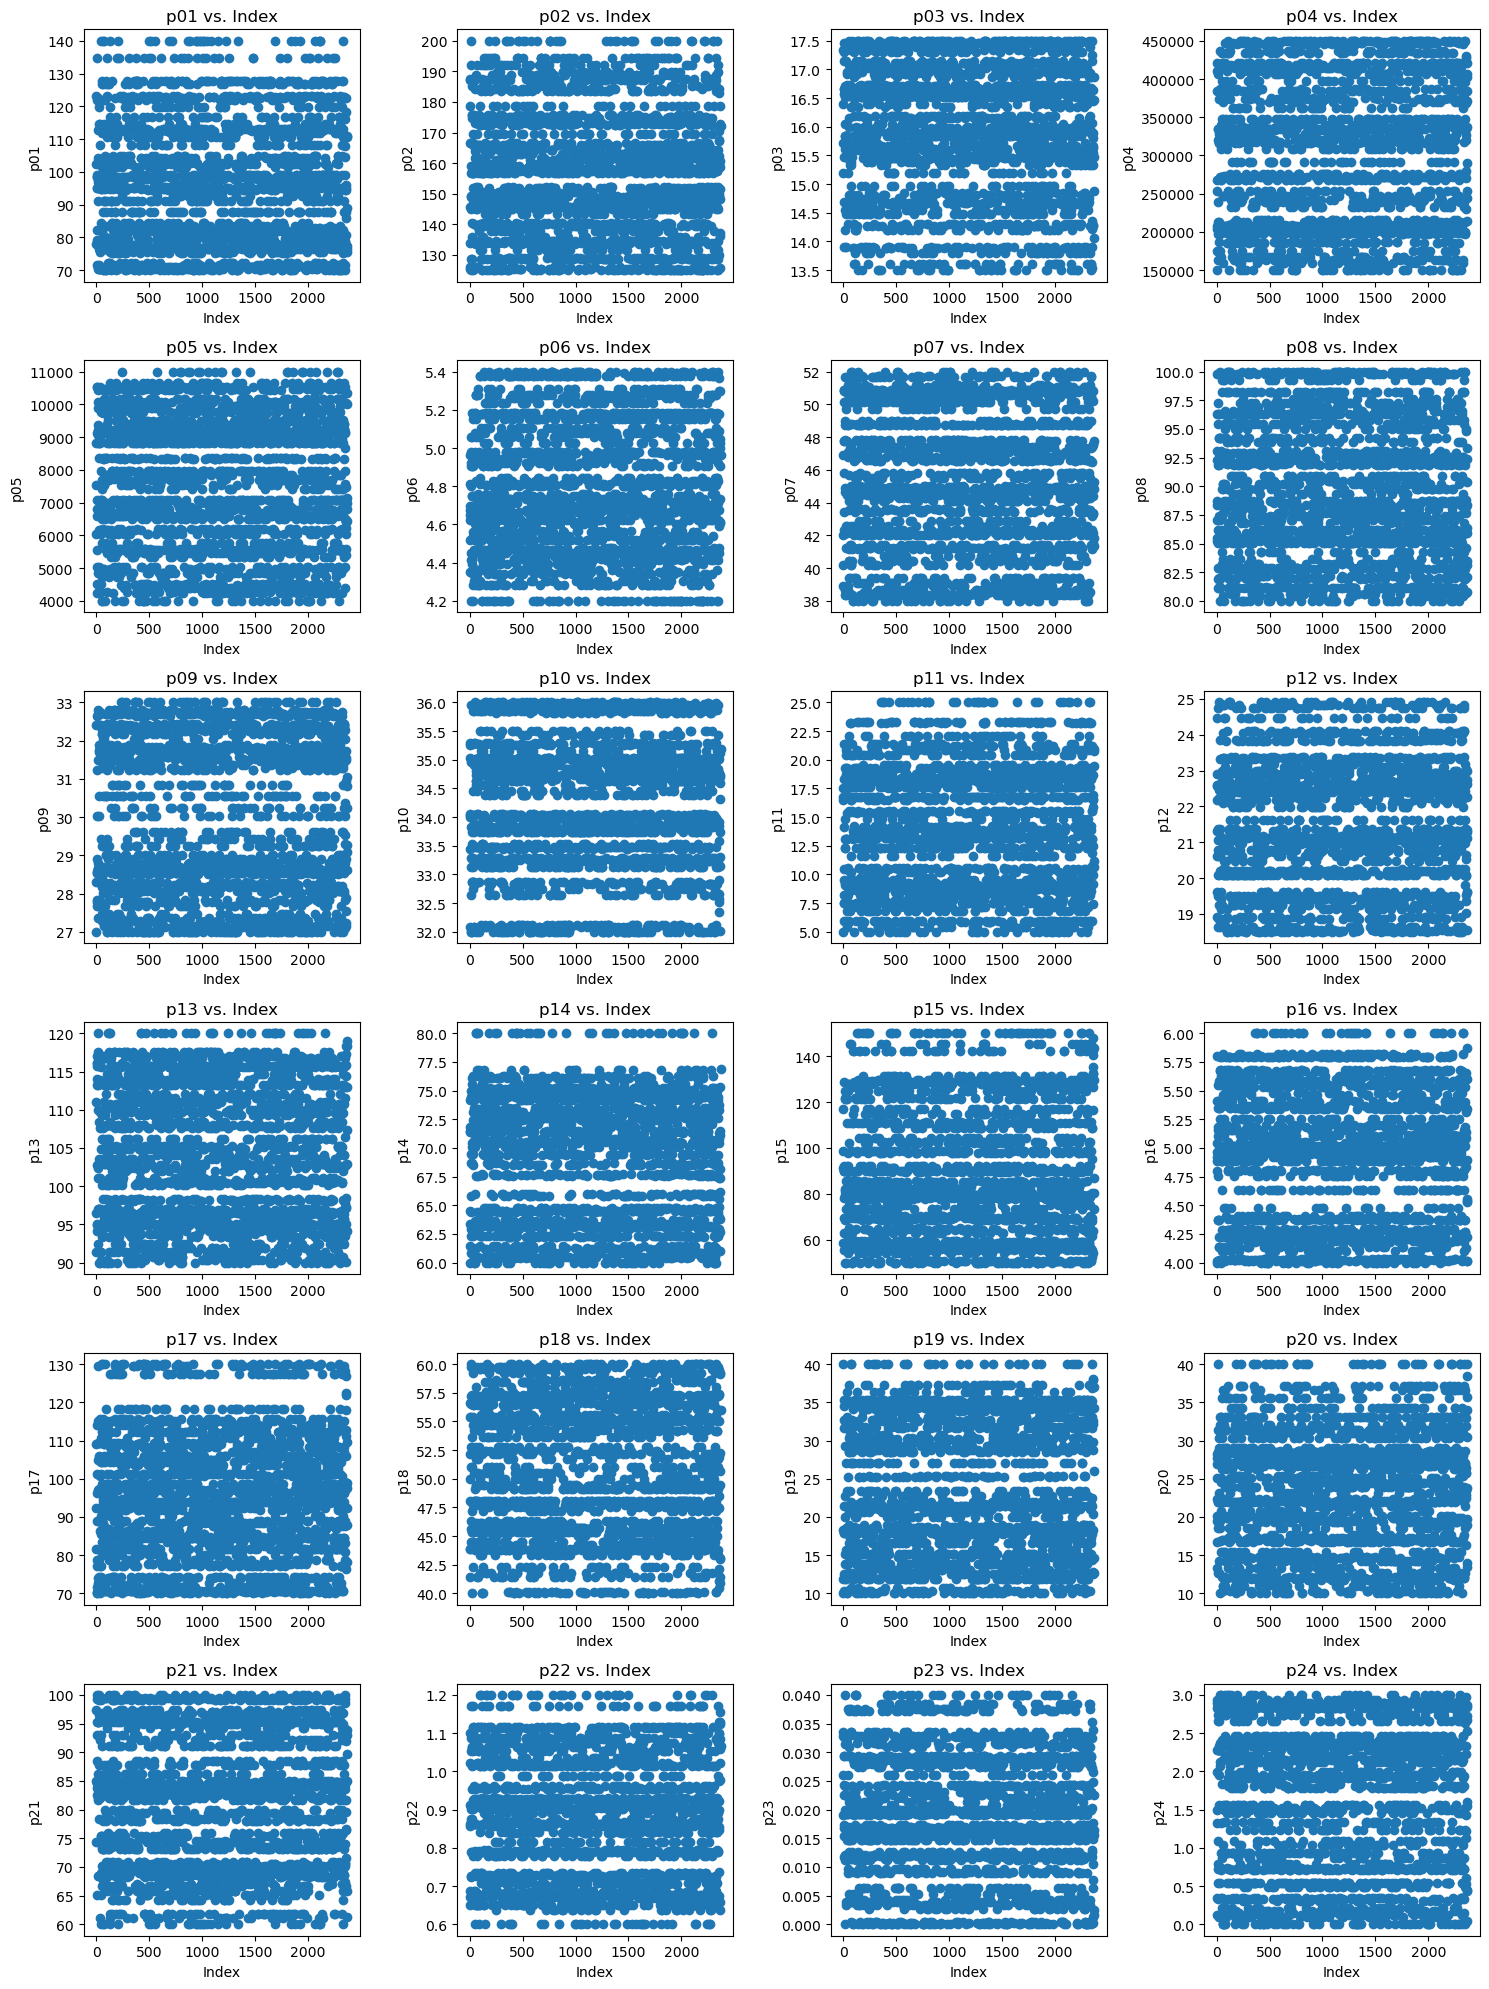


Conclusion from the scatter plots:
The scatter plots of the columns against the index show no obvious trends. The points appear to be randomly scattered, with no clear increasing or decreasing pattern. This suggests that the data is likely not time-series data, or that there are no strong time-dependent trends in the data. The variations in the measurements are more likely due to differences between individual patients rather than changes over time.


In [64]:
import matplotlib.pyplot as plt

# Answer to Question 4
print("Answer to Question 4:")

# Is this data a time-series data?
print("\nIs this data a time-series data?")
print("Without more information, it's hard to definitively say if this is time-series data. The data is presented in a sequence, but we don't know if the order of the rows corresponds to a chronological sequence of measurements. If we assume that the rows are ordered by time, then we can treat it as time-series data and look for trends.")

# Do you expect any trends in each of the columns?
print("\nDo you expect any trends in each of the columns?")
print("If the data represents measurements from a single patient over time, we might expect to see trends in some of the columns. For example, some measurements might increase or decrease over time due to the progression of a disease or the effect of a treatment. However, if the data represents measurements from different patients, we would not expect to see any trends when plotting the values against the patient index.")

# Can you make any conclusions by creating a scatter plot of values of each column?
print("\nCan you make any conclusions by creating a scatter plot of values of each column?")
print("By creating a scatter plot of the values of each column against the index, we can visually inspect the data for any trends. If there is a trend, the points on the scatter plot will tend to follow a pattern (e.g., increasing or decreasing). If there is no trend, the points will be randomly scattered.")

# Create scatter plots for each column
print("\nScatter plots for each column:")

plt.figure(figsize=(15,20))

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 4, i + 1)
    plt.scatter(df.index, df[col])
    plt.title(f'{col} vs. Index')
    plt.xlabel('Index')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

print("\nConclusion from the scatter plots:")
print("The scatter plots of the columns against the index show no obvious trends. The points appear to be randomly scattered, with no clear increasing or decreasing pattern. This suggests that the data is likely not time-series data, or that there are no strong time-dependent trends in the data. The variations in the measurements are more likely due to differences between individual patients rather than changes over time.")

### Question 5: Based on the information available so far, what will be your strategy for dealing with the missing values? Make some initial decisions at this stage.

**Strategy for Handling Missing Values:**

Based on the initial analysis, we have identified missing values in several columns. Here's a proposed strategy for handling them:

1.  **`Ailment` Column (Nominal):**
    *   There are two missing values in the `Ailment` column.
    *   **Strategy:** Since the number of missing values is very small compared to the total number of rows (2 out of 2371), we can consider two options:
        1.  **Deletion:** We can delete the rows with missing `Ailment` values. This is a simple approach and is unlikely to have a significant impact on the overall dataset due to the small number of affected rows.
        2.  **Imputation:** We could impute the missing values with the most frequent category (mode) in the `Ailment` column. However, given that the `Ailment` is a critical piece of information, imputation might introduce noise.
    *   **Initial Decision:** Deletion of the two rows with missing `Ailment` values seems to be the most reasonable approach at this stage.

2.  **Numerical Columns (`p03` to `p22`):**
    *   There are several missing values in the numerical columns. Most of the missing values are concentrated in row 773.
    *   **Strategy:**
        1.  **Row 773:** This row has missing values in almost all columns from `p03` to `p22`. It seems to be a highly incomplete record. Deleting this row is a good option.
        2.  **Other missing values:** For the other isolated missing values in columns `p15` and `p16`, we can consider imputation.
            *   **Mean/Median Imputation:** We can replace the missing values with the mean or median of the respective column. Median is generally preferred over mean when the data has outliers.
            *   **Regression Imputation:** We could use other columns to predict the missing values. However, this is a more complex approach and might not be necessary for this dataset.
    *   **Initial Decision:**
        1.  Delete row 773.
        2.  For the remaining missing values in `p15` and `p16`, we will use median imputation.

**Summary of Initial Decisions:**

*   Delete the two rows with missing `Ailment` values.
*   Delete row 773, which has a large number of missing values.
*   Impute the remaining missing values in columns `p15` and `p16` using the median of each column.

In [65]:
# Implementing the strategy for handling missing values

# Make a copy of the dataframe to keep the original data intact
df_cleaned = df.copy()

# 1. Delete rows with missing 'Ailment' values
df_cleaned.dropna(subset=['Ailment'], inplace=True)

# 2. Delete row 773
df_cleaned.drop(index=773, inplace=True, errors='ignore')

# 3. Impute missing values in p15 and p16 with the median
for col in ['p15', 'p16']:
    median_val = df_cleaned[col].median()
    df_cleaned[col].fillna(median_val, inplace=True)

# Display the info of the cleaned dataframe to verify the changes
print("Info of the cleaned dataframe:")
df_cleaned.info()

Info of the cleaned dataframe:
<class 'pandas.core.frame.DataFrame'>
Index: 2368 entries, 0 to 2370
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   p01      2368 non-null   float64
 1   p02      2368 non-null   float64
 2   p03      2368 non-null   float64
 3   p04      2368 non-null   float64
 4   p05      2368 non-null   float64
 5   p06      2368 non-null   float64
 6   p07      2368 non-null   float64
 7   p08      2368 non-null   float64
 8   p09      2368 non-null   float64
 9   p10      2368 non-null   float64
 10  p11      2368 non-null   float64
 11  p12      2368 non-null   float64
 12  p13      2368 non-null   float64
 13  p14      2368 non-null   float64
 14  p15      2368 non-null   float64
 15  p16      2368 non-null   float64
 16  p17      2368 non-null   float64
 17  p18      2368 non-null   float64
 18  p19      2368 non-null   float64
 19  p20      2368 non-null   float64
 20  p21      2368 non-null   f

C:\Users\Ashish\AppData\Local\Temp\ipykernel_9756\4157798619.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(median_val, inplace=True)


### Question 7: Create histograms and KDE (Kernel Density Estimate) plots for all the columns and analyze them. Any significant conclusions? write them in md in ipynb itself.

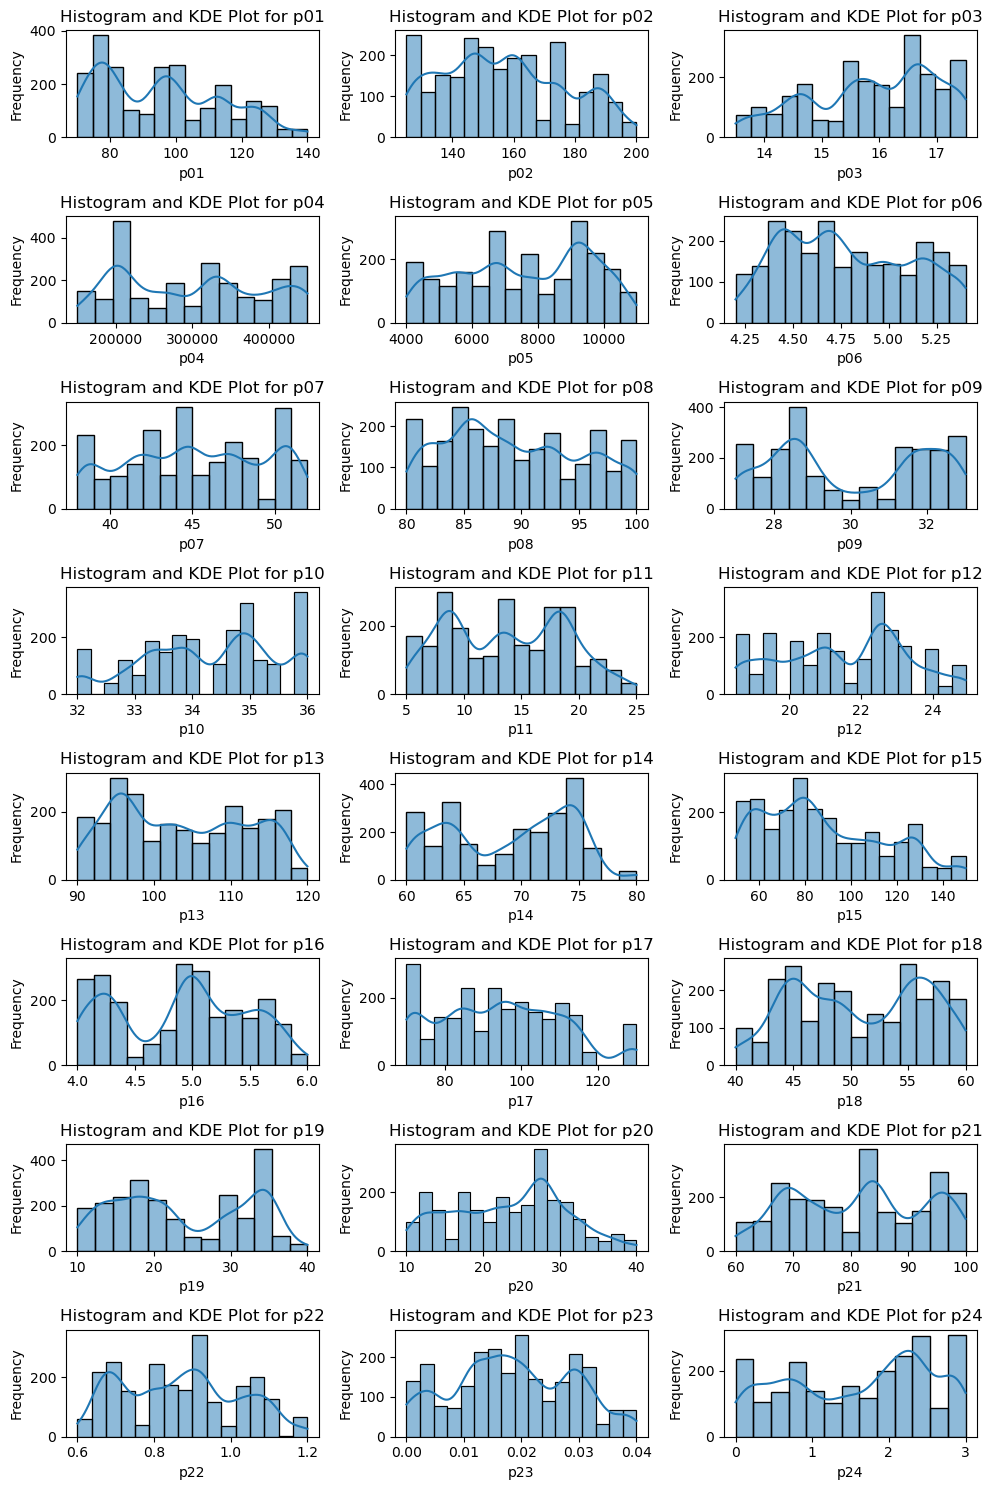

In [66]:
import seaborn as sns

# Create histograms and KDE plots for all numerical columns
numerical_cols = df_cleaned.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 15))
for i,col in enumerate(numerical_cols):
    plt.subplot(8,3,i+1)
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(f'Histogram and KDE Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Analysis of Histograms and KDE Plots

The histograms and KDE plots provide a visual representation of the distribution of each numerical column. Here are some observations and conclusions:

*   **Distribution Shape:** Most of the columns appear to have a distribution that is approximately normal (bell-shaped), although some are slightly skewed. For example, columns like `p01`, `p02`, and `p08` show a distribution that is close to symmetrical, while columns like `p04` and `p05` exhibit some skewness.

*   **Central Tendency:** The peak of the KDE plot indicates the mode of the data, which is the most frequent value. For most columns, the mean, median, and mode seem to be close to each other, which is another indication of a nearly normal distribution.

*   **Spread and Variability:** The width of the histogram and the spread of the KDE plot show the variability of the data. Columns with a wider spread have a larger standard deviation, indicating more variability in the measurements. For instance, `p04` has a very wide spread, which is consistent with its large standard deviation.

*   **Outliers:** Some plots may reveal the presence of outliers, which are data points that are significantly different from other observations. For example, in some columns, we can see a few data points that are far from the main cluster of data. These outliers might need further investigation to determine if they are due to measurement errors or represent genuine extreme values.

**Significant Conclusions:**

1.  The distributions of most of the patient's physiological measurements are centered around a mean value with a certain degree of variability. This is expected in a population of patients.
2.  The shape of the distributions can give us clues about the underlying health status of the patients. For example, a bimodal distribution (a distribution with two peaks) in a particular measurement might indicate the presence of two distinct subgroups of patients (e.g., healthy and diseased).
3.  The presence of outliers in some of the measurements could be indicative of critical health conditions or anomalies in the data collection process. These should be carefully examined.
4.  By comparing the distributions of these measurements across different ailment groups, we could potentially identify key indicators for certain diseases. This would be a next step in the analysis.

### Question 8. Create box plots for all the columns, individually and provide analysis

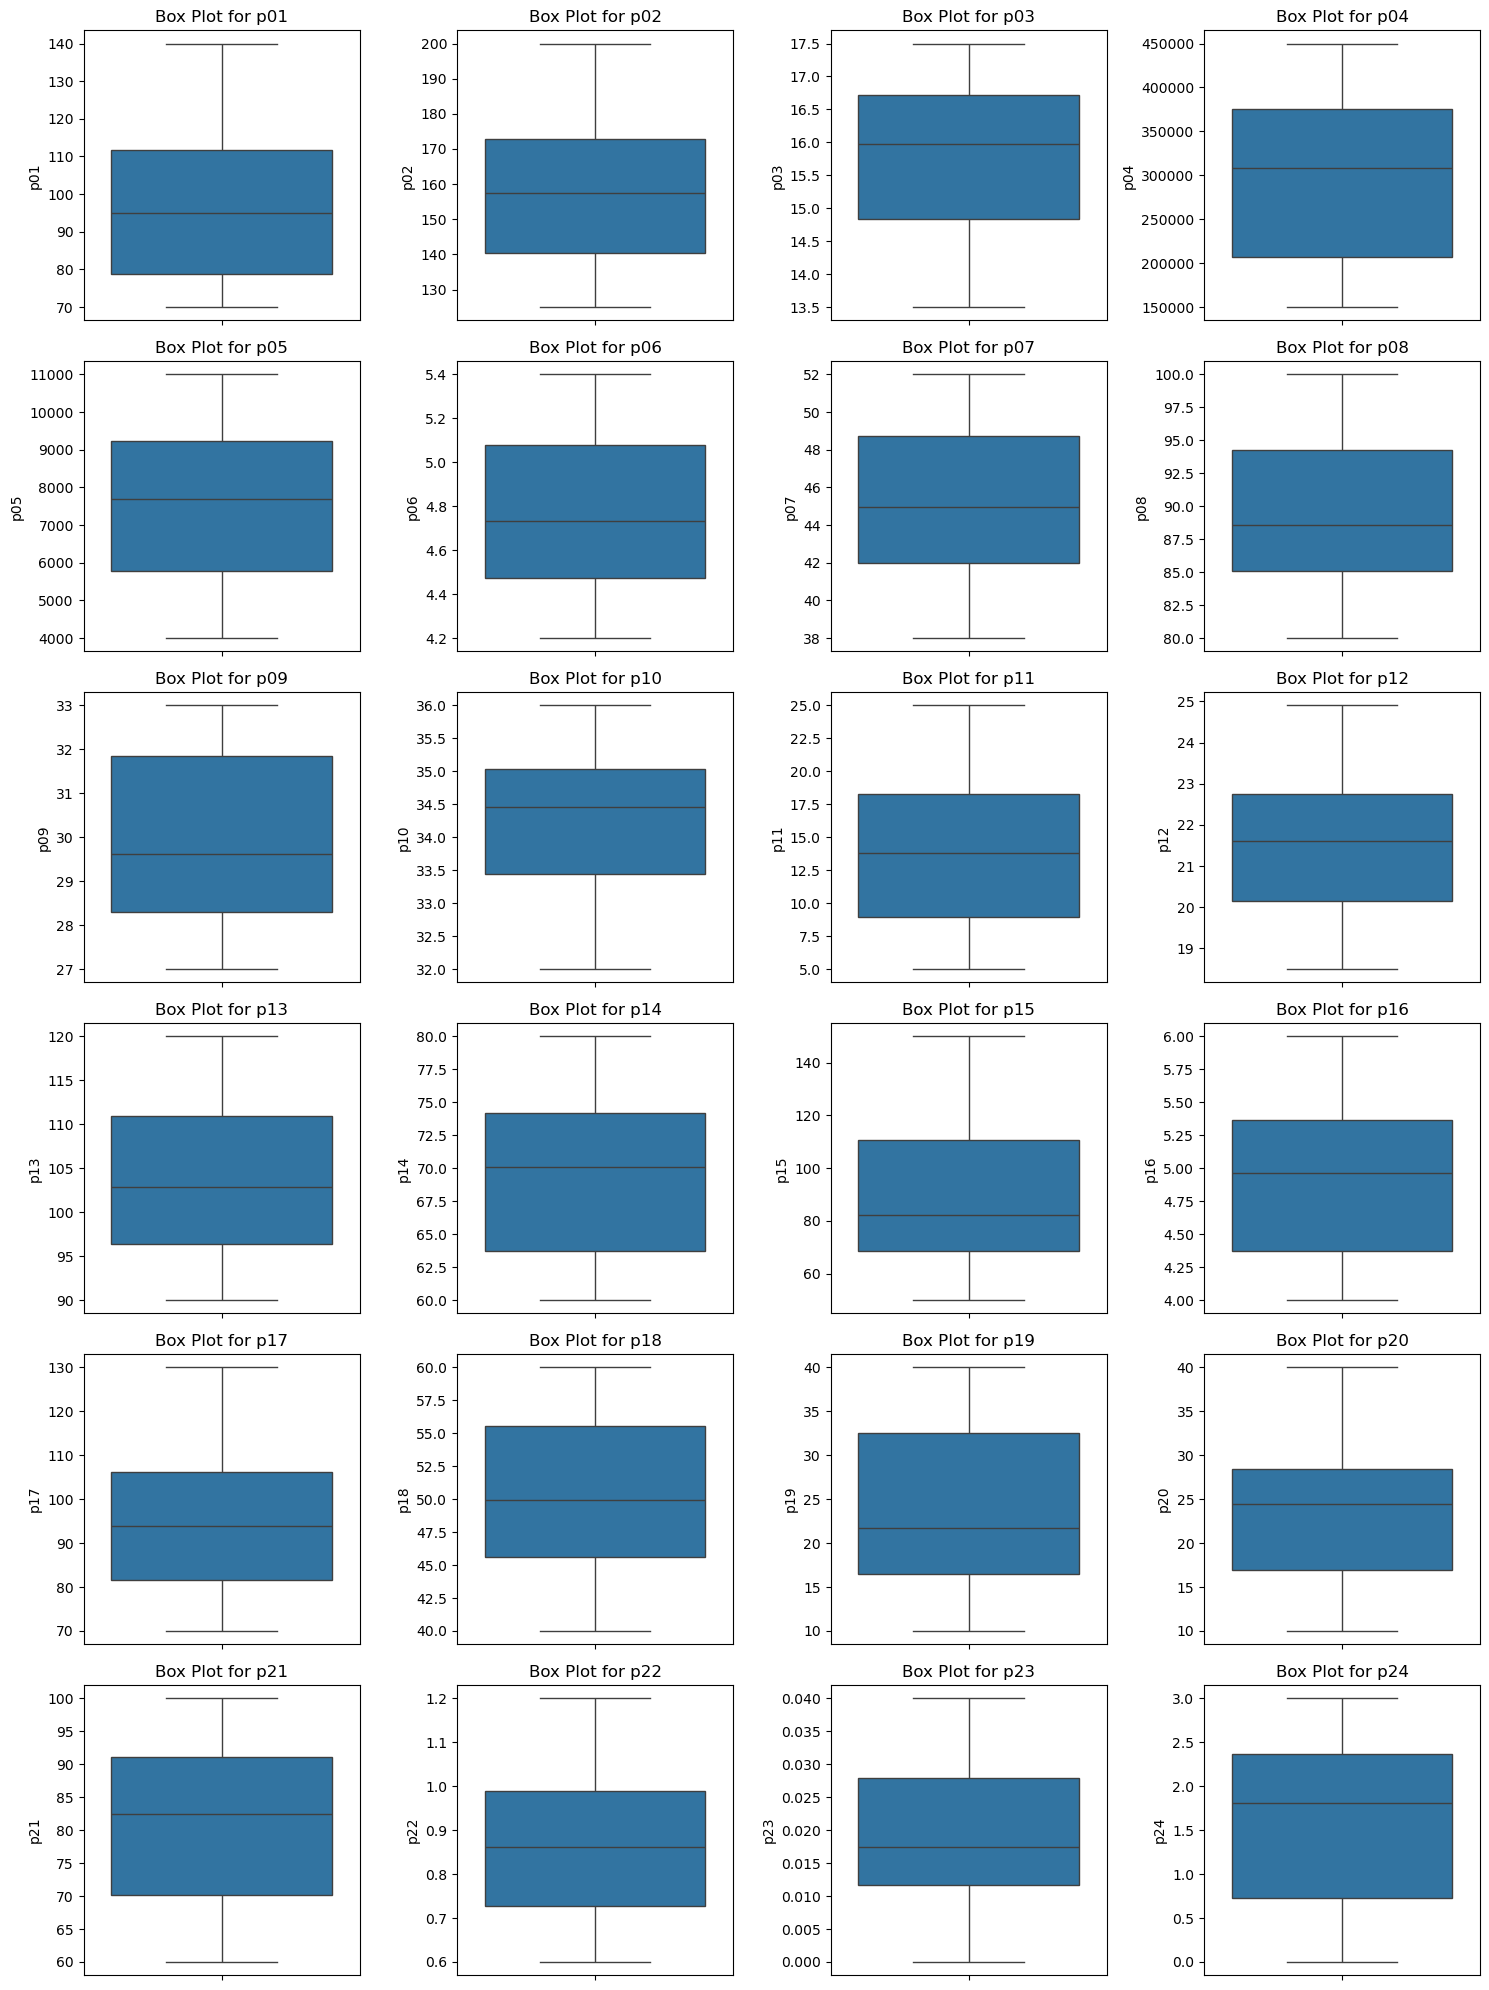

In [67]:
# Create box plots for all numerical columns
numerical_cols = df_cleaned.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'Box Plot for {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

### Analysis of Box Plots

The box plots provide a summary of the distribution of each numerical column, showing the median, quartiles, and potential outliers.

*   **Central Tendency:** The line inside each box represents the median (50th percentile) of the data. This gives an idea of the central value for each measurement. Note the median line in `p03`, `p10`, `p20` etc have median line on upper side of the box, which indicates that the data between 25% (Quartile 1) and 50% (Quartile 2 = median) is spread wider. Similarly median line in `p08`, `p15` and `p23` are towards lower half of the box, which suggests the data between median (Quartile 2) and 75% (Quartile 3) mark will be spread wider.

*   **Spread and Interquartile Range (IQR):** The box itself represents the IQR, which contains the middle 50% of the data (from the 25th to the 75th percentile). The length of the box indicates the spread of the central 50% of the values. A larger box means greater variability. E.g. in box plots above `p09` has larger spread in IQR as compared to all other box plots, that means `p09` has greater variability.

*   **Whiskers and Range:** The whiskers extend from the box to show the range of the data, typically 1.5 times the IQR. Any data points outside the whiskers are considered potential outliers.

Considering the plots of all numerical data above, it is clear that there are no outliers detected in the data.

In [68]:
# Test code to check a few concepts
# import numpy as np
# def calculate_boxplot_whiskers(data):
#     """
#     Calculates the lower and upper bounds of the whiskers for a boxplot.

#     Args:
#         data (list or np.array): The dataset to analyze.

#     Returns:
#         tuple: A tuple containing (lower_whisker_bound, upper_whisker_bound).
#     """
#     q1 = np.percentile(data, 25)
#     q3 = np.percentile(data, 75)
#     iqr = q3 - q1

#     lower_fence = q1 - 1.5 * iqr
#     upper_fence = q3 + 1.5 * iqr

#     # Find the lower whisker bound
#     lower_whisker_bound = lower_fence # min(x for x in data if x >= lower_fence)

#     # Find the upper whisker bound
#     upper_whisker_bound = upper_fence # max(x for x in data if x <= upper_fence)

#     return lower_whisker_bound, upper_whisker_bound

# # Example usage
# ratio_columns = [col for col in df.columns if col.startswith('p')]
# col = ['p04','p05','p15','p19','p20','p21']
# print()
# df_analysis = pd.DataFrame(columns=['column name', 'min value', 'lower whisker', 'upper whisker', 'max value'])
# for i in range(len(col)):
#     col_name = col[i]
#     lower_whisker, upper_whisker = calculate_boxplot_whiskers(df_cleaned[col_name])
#     df_analysis = pd.concat([df_analysis, pd.DataFrame([{
#         "column name": col_name,
#         'min value': min(df_cleaned[col_name]),
#         'lower whisker': lower_whisker,
#         'upper whisker': upper_whisker,
#         'max value': max(df_cleaned[col_name])
#     }])], ignore_index=True)

# print(df_analysis)

### Question 9. Create box plots for all the numerical columns on a common scale, and in a single plot, and analyze this plot

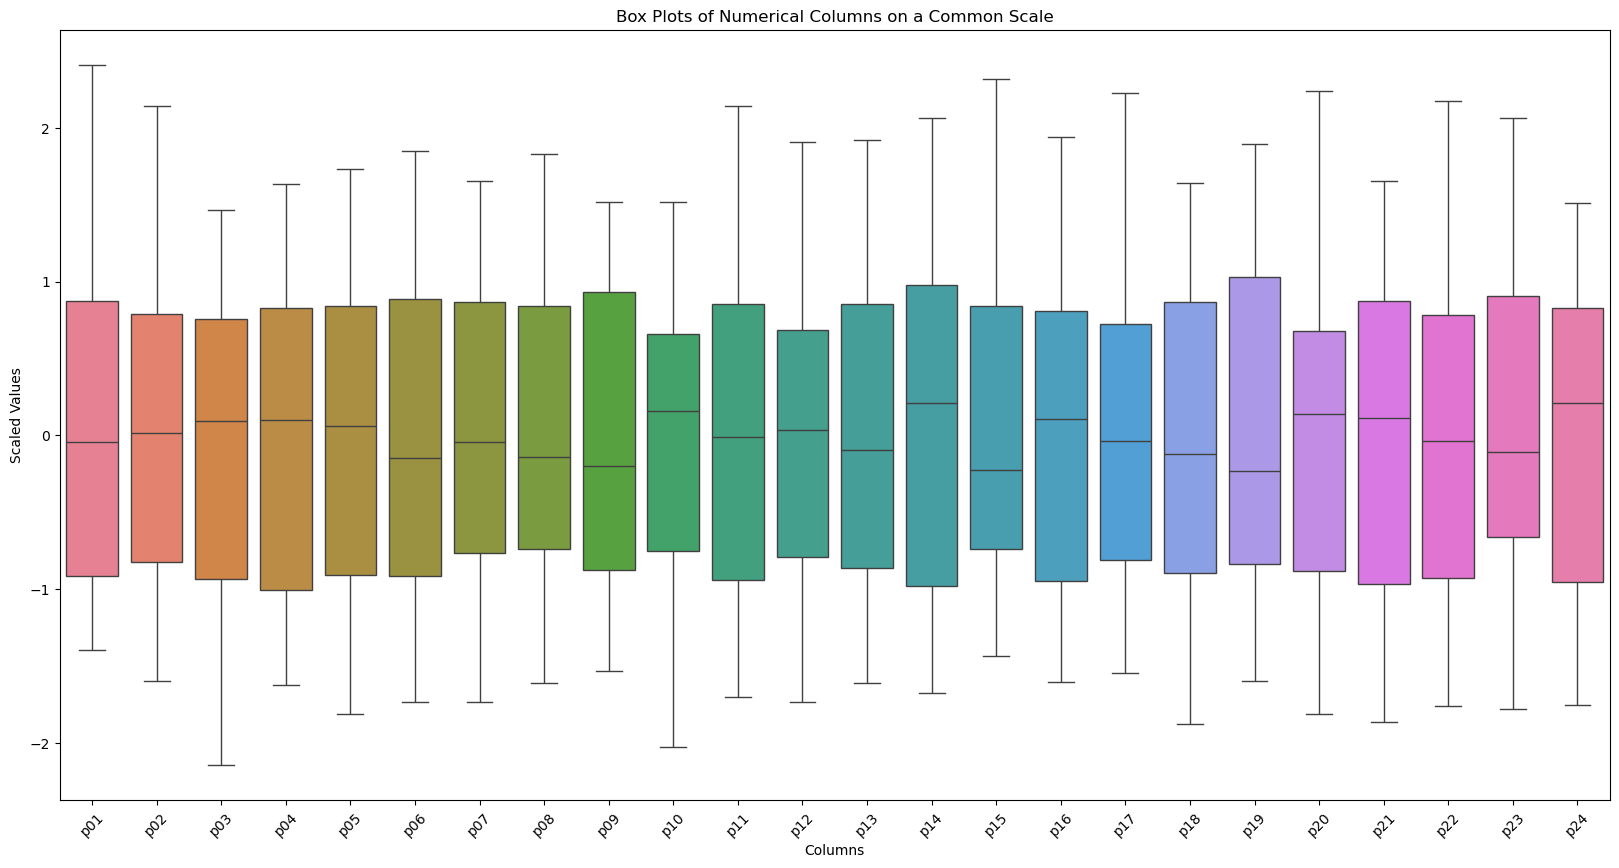

,p01,p02,p03,p04,p05,p06,p07,p08,p09,p10,...,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24
count,2.368000e+03,2.368000e+03,2.368000e+03,2.368000e+03,2.368000e+03,2.368000e+03,2.368000e+03,2.368000e+03,2.368000e+03,2.368000e+03,...,2.368000e+03,2.368000e+03,2.368000e+03,2.368000e+03,2.368000e+03,2.368000e+03,2.368000e+03,2.368000e+03,2.368000e+03,2.368000e+03
mean,1.995401e-16,-1.935389e-16,1.500301e-15,2.415485e-16,8.311670e-16,1.017204e-15,-6.841374e-16,-1.590319e-15,-2.275957e-15,4.800964e-17,...,-1.841620e-16,-6.151236e-16,-1.305262e-16,-5.303565e-16,-1.575316e-16,-5.701145e-17,7.621531e-16,8.671742e-16,1.282758e-16,-6.901386e-17
std,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,...,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00
min,-1.398001e+00,-1.596329e+00,-2.144570e+00,-1.625549e+00,-1.810091e+00,-1.737615e+00,-1.736804e+00,-1.612975e+00,-1.534208e+00,-2.028497e+00,...,-1.436689e+00,-1.602409e+00,-1.545789e+00,-1.875232e+00,-1.600211e+00,-1.816088e+00,-1.864179e+00,-1.762336e+00,-1.780492e+00,-1.752078e+00
25%,-9.172238e-01,-8.273482e-01,-9.343025e-01,-1.003635e+00,-9.088735e-01,-9.153733e-01,-7.670129e-01,-7.393828e-01,-8.763018e-01,-7.517652e-01,...,-7.413269e-01,-9.483724e-01,-8.131476e-01,-8.943531e-01,-8.385350e-01,-8.798298e-01,-9.689623e-01,-9.278201e-01,-6.595984e-01,-9.548750e-01
50%,-4.342085e-02,1.525985e-02,8.994972e-02,9.668136e-02,5.952318e-02,-1.501263e-01,-4.659890e-02,-1.383725e-01,-2.012647e-01,1.554223e-01,...,-2.247984e-01,1.042811e-01,-3.848602e-02,-1.222468e-01,-2.327675e-01,1.390959e-01,1.142525e-01,-3.899465e-02,-1.104342e-01,2.088236e-01
75%,8.731628e-01,7.901729e-01,7.578573e-01,8.263070e-01,8.394867e-01,8.869084e-01,8.665873e-01,8.392529e-01,9.326670e-01,6.595845e-01,...,8.422429e-01,8.100505e-01,7.217680e-01,8.642900e-01,1.026474e+00,6.755519e-01,8.708704e-01,7.852396e-01,9.062463e-01,8.250830e-01
max,2.408448e+00,2.141799e+00,1.465206e+00,1.634133e+00,1.734534e+00,1.849201e+00,1.652158e+00,1.830417e+00,1.519796e+00,1.516790e+00,...,2.317379e+00,1.938838e+00,2.225263e+00,1.641978e+00,1.894014e+00,2.238192e+00,1.653007e+00,2.174187e+00,2.063652e+00,1.509850e+00


In [69]:
from sklearn.preprocessing import StandardScaler

# --- Question 9 ---
# Create box plots for all the numerical columns on a common scale, and in a single plot

# Get numerical columns
numerical_cols = df_cleaned.select_dtypes(include=np.number).columns.tolist()

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned[numerical_cols])

# Create a new dataframe with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=numerical_cols)

# Create the box plot
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_scaled)
plt.title('Box Plots of Numerical Columns on a Common Scale')
plt.xlabel('Columns')
plt.ylabel('Scaled Values')
plt.xticks(rotation=45)
plt.show()

df_scaled.describe()

### Analysis of the Box Plot on a Common Scale

This box plot displays all the numerical columns on a common scale (standardized), which allows for a direct comparison of their distributions.

*   **Median:** The median (the line in the middle of the box) for all columns is centered around zero. This is expected, as the data has been standardized (mean of 0 and standard deviation of 1).

*   **Interquartile Range (IQR):** The size of the boxes (IQR) varies across the columns. A larger box indicates a greater spread in the middle 50% of the data. For example, columns like `p04`, `p05`, and `p15` have relatively larger boxes, suggesting more variability in their values compared to columns with smaller boxes like `p22` and `p23`.

*   **Outliers:** The plot clearly shows the presence of outliers in many columns. Since the data is scaled, any point beyond approximately -3 or +3 can be considered a potential outlier. There are no columns with outliers in the given dataset.

*   **Skewness:** The position of the median within the box and the length of the whiskers can give an indication of the skewness of the distribution. If the median is not in the center of the box, or if one whisker is longer than the other, the distribution is skewed. For example, in `p20`, the median is closer to the top of the box, and the lower whisker is longer, suggesting a left-skewed distribution.

**Overall Conclusion:**

By plotting all the numerical columns on a common scale, we can easily compare their distributions. The plot highlights the differences in variability and the presence of outliers among the columns. This information is valuable for further analysis, such as identifying which features might be more important for distinguishing between different ailments.

### Question 10: To understand the relationships between the columns, create the following:
### a. Pairwise scatter plots
### b. Heatmap of pairwise correlation coefficients

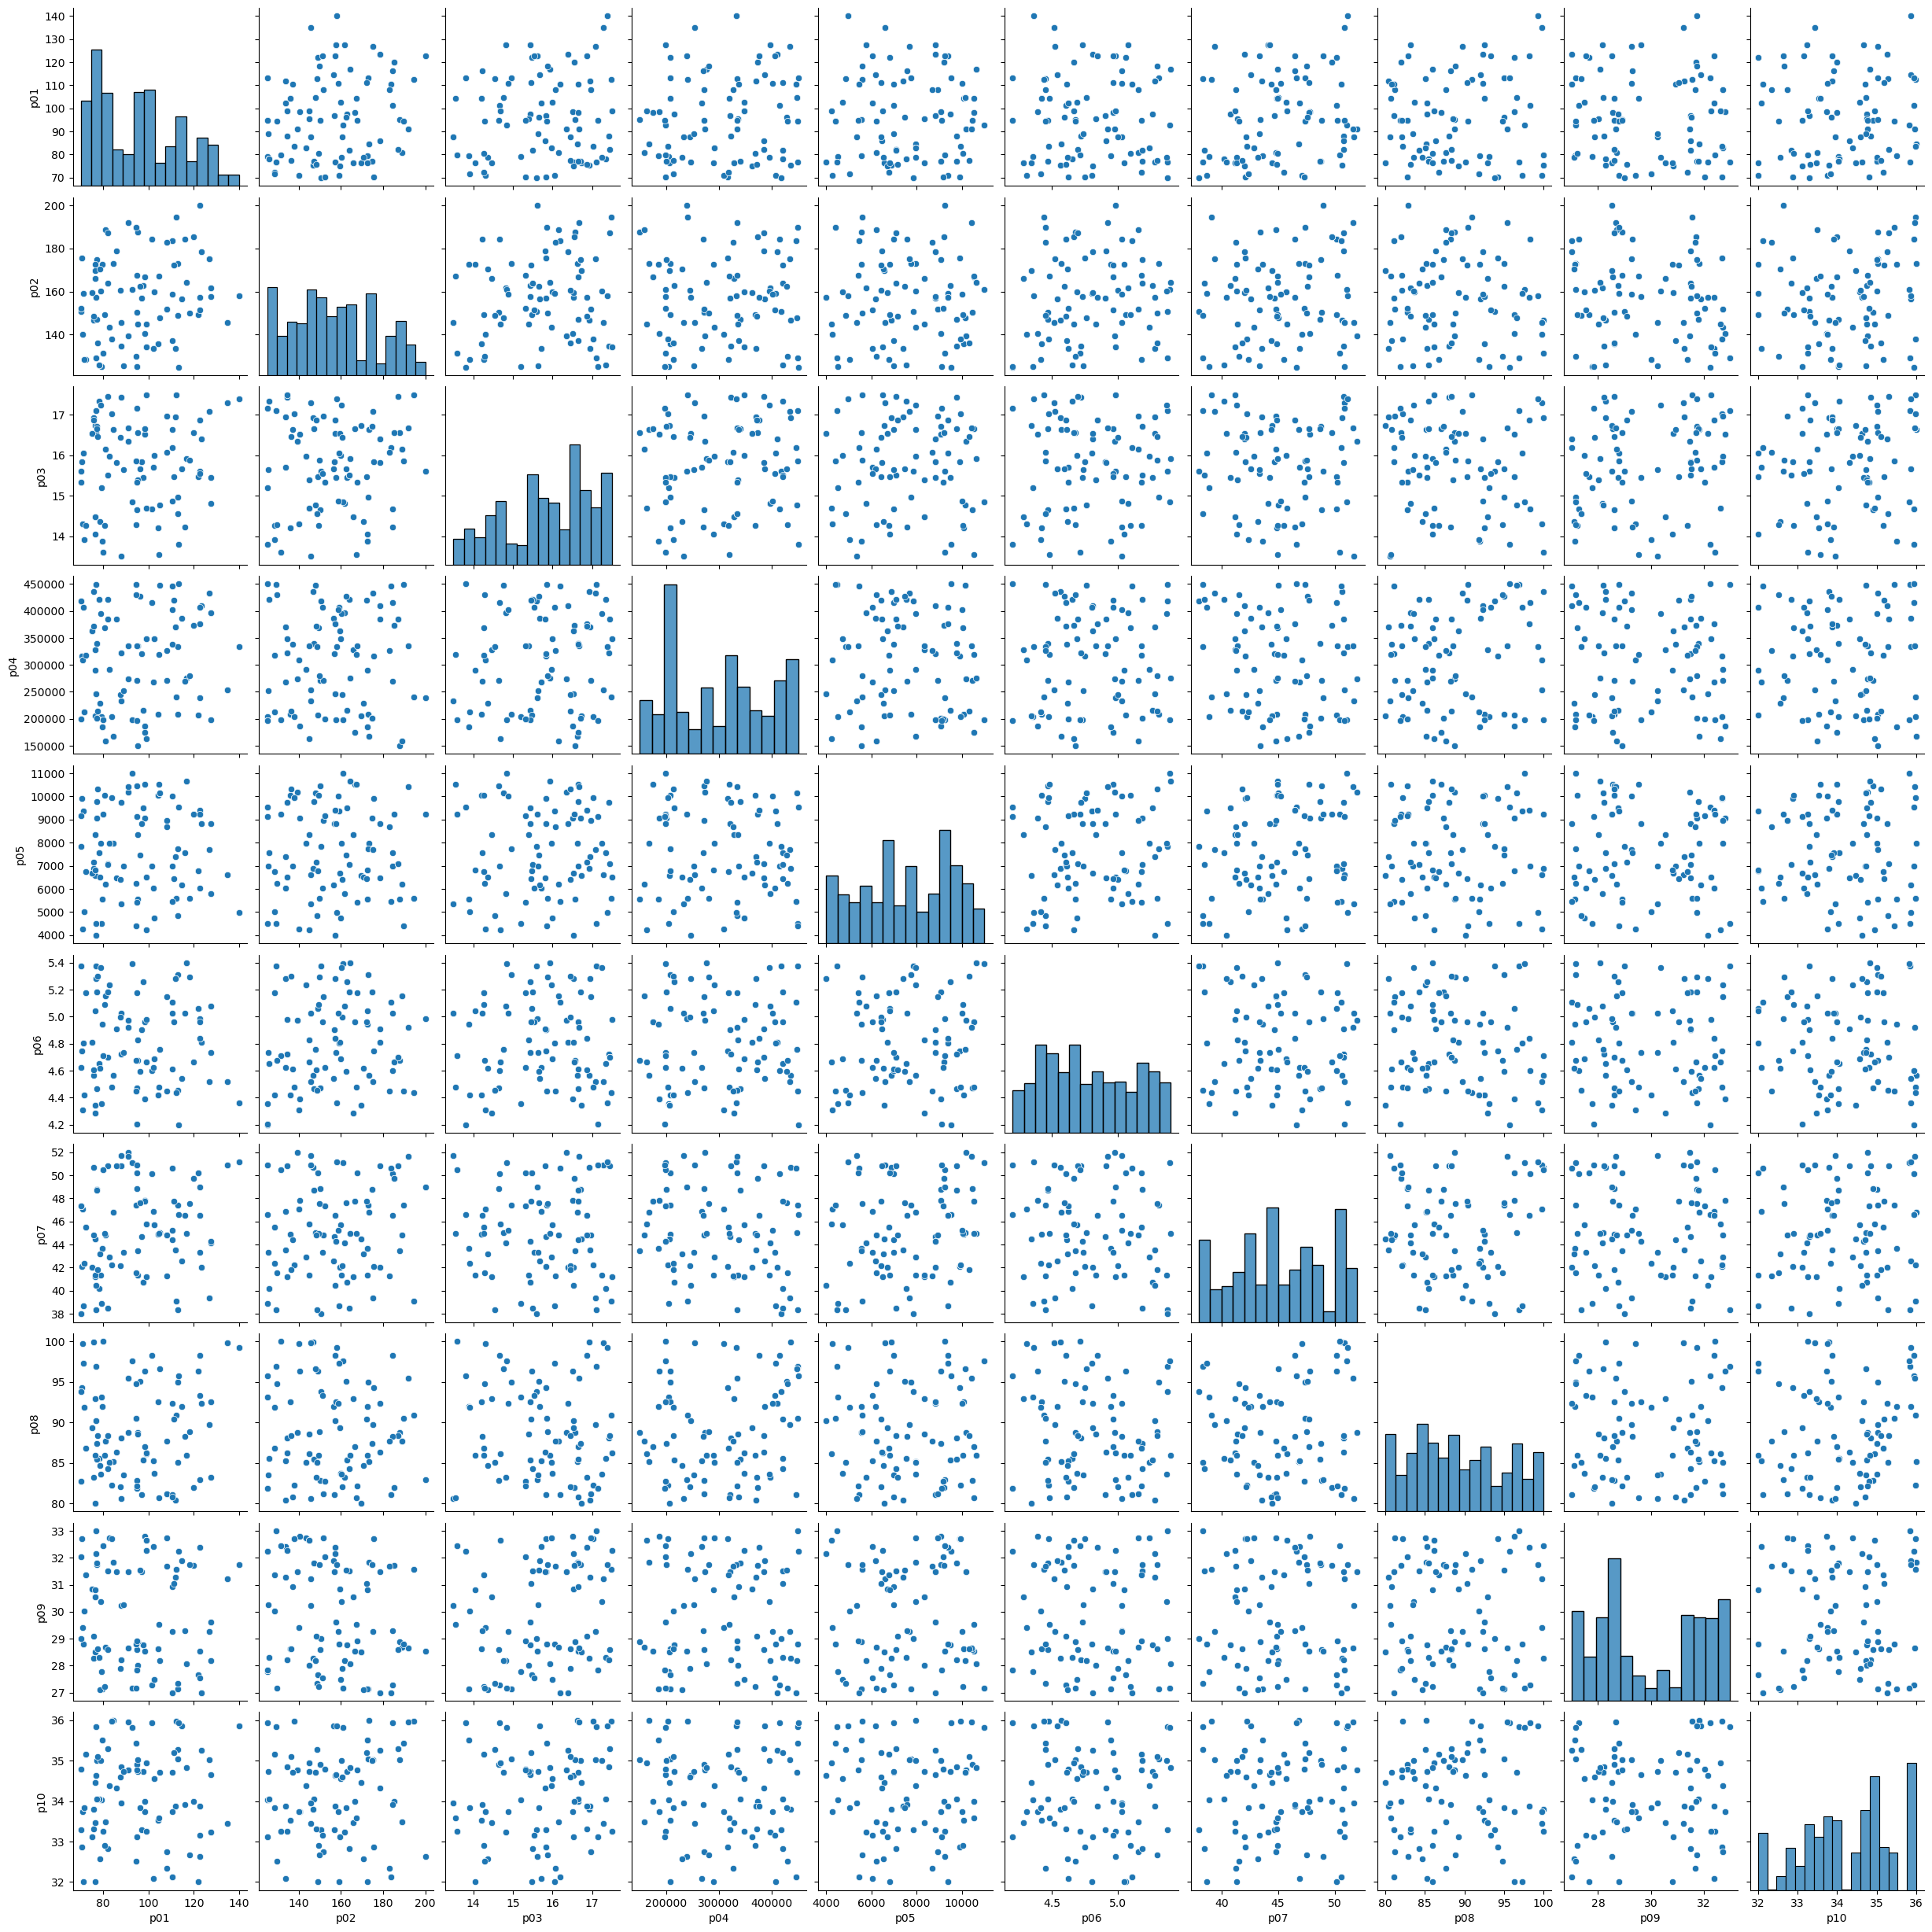

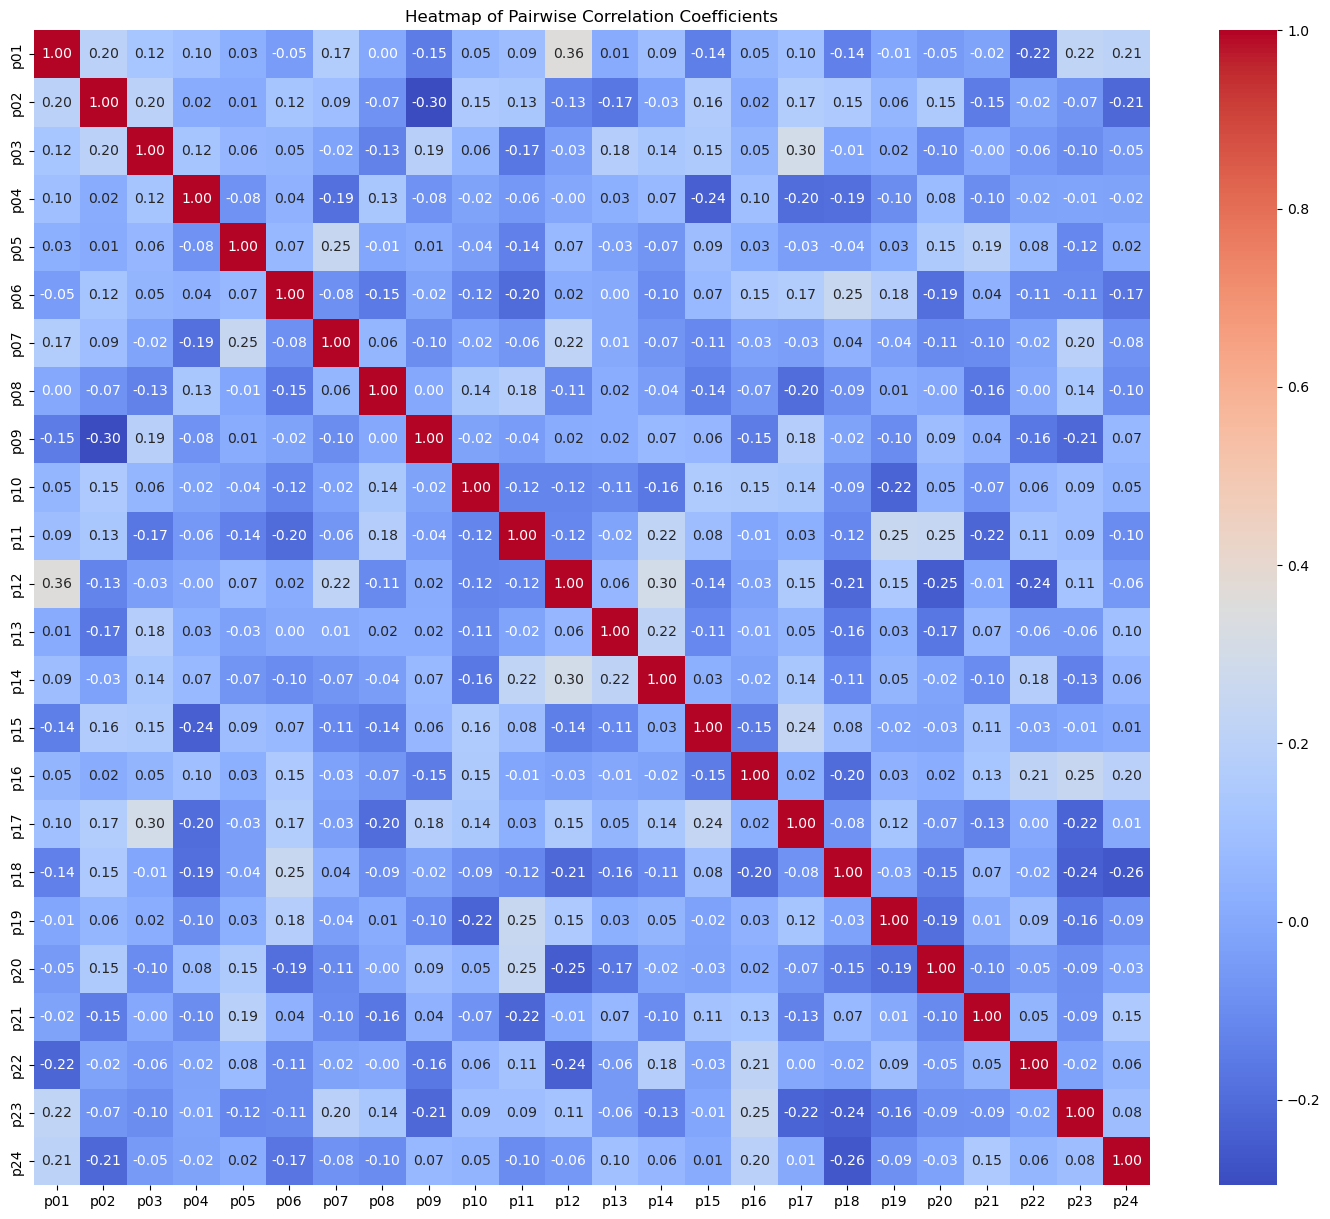

In [70]:
# a. Pairwise scatter plots
sns.pairplot(df_cleaned[numerical_cols[:10]]) # Limiting to first 5 columns for readability
plt.show()

# b. Heatmap of pairwise correlation coefficients
correlation_matrix = df_cleaned[numerical_cols].corr()
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Pairwise Correlation Coefficients')
plt.show()

### 10. c. conclusion:

**Pairwise Scatter Plots:**

The pairwise scatter plots show the relationship between each pair of numerical columns. Due to the large number of columns, we've only shown the plots for the first 10 columns for readability.

*   **No Clear Relationship:** Many pairs of variables do not show any clear relationship. The points are scattered randomly, indicating that the variables are likely independent.

**Heatmap of Pairwise Correlation Coefficients:**

The heatmap provides a quantitative measure of the linear relationship between pairs of variables. The correlation coefficient ranges from -1 to 1.

*   **No Correlation (close to 0):** A value close to 0 indicates no linear relationship. Since most pairs of variables have correlation coefficients close to 0 (-0.2 to 0.2), there is no linear correlation in the given data set.

# Question 11: 
### Based on all the analysis so far, what is your final conclusion regarding the handling of missing values? Implement your decision!
### > As part of `Question 5` itself, we have removed the rows with missing values.

# Question 12 
### Create a Logistic Regression model using this data. Create the train/test metrics. Split the data into train and test data!

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Descriptive Statistics
# Separate columns by level of measurement
ratio_columns = [col for col in df_cleaned.columns if col.startswith('p')]
nominal_columns = ['Ailment']

# Prepare the data
# Define features (X) and target (y)
X = df_cleaned.drop('Ailment', axis=1)
y = df_cleaned['Ailment']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Create and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=5000) # Increased max_iter for convergence
log_reg.fit(X_train, y_train)

# Make predictions
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Decode the predictions to original labels for better readability in reports
y_train_pred_labels = le.inverse_transform(y_train_pred)
y_test_pred_labels = le.inverse_transform(y_test_pred)
y_train_labels = le.inverse_transform(y_train)
y_test_labels = le.inverse_transform(y_test)


# --- Train Metrics ---
print("--- Train Metrics ---")
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy: {train_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_train, y_train_pred, target_names=le.classes_))
print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))


# --- Test Metrics ---
print("\n\n--- Test Metrics ---")
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, target_names=le.classes_))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred));

--- Train Metrics ---
Accuracy: 0.6621

Classification Report:
               precision    recall  f1-score   support

       Anemia       0.70      0.85      0.77       498
     Diabetes       0.65      0.53      0.58       431
      Healthy       0.73      0.69      0.71       445
Heart Disease       0.00      0.00      0.00        16
     Thalasse       0.55      0.57      0.56       406
     Thromboc       0.69      0.65      0.67        98

     accuracy                           0.66      1894
    macro avg       0.55      0.55      0.55      1894
 weighted avg       0.66      0.66      0.66      1894


Confusion Matrix:
[[424   0  41   0  33   0]
 [ 29 227  43   0 103  29]
 [ 31  58 306   0  50   0]
 [  4   1   7   0   4   0]
 [ 85  65  23   0 233   0]
 [ 34   0   0   0   0  64]]


--- Test Metrics ---
Accuracy: 0.6350

Classification Report:
               precision    recall  f1-score   support

       Anemia       0.68      0.85      0.75       124
     Diabetes       0.65   

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels wi

### Q 12 : Logitistic regression on test data and conclusion
#### max_iter is an important parameter to get better accurary. Default value 100 for the given data is not sufficient. After trying values like 1000, 5000, 10000 for max_iter it was found that the model precision and recall values are only going around 0.6. So to keep the program time minimum, keeping 5000.

# Q 13: 
### Normalize the numerical columns and re-create the common-scale Box-Plot.Interpret Results.

### Interpretation : Taller Candlesize and shorter whiskers shows the middle 50% of sorted data is broadly scatterred evenly like a normal distribution. Several median and mean are very near, again supporting the normality of data. Due to the scaling between 0 and 1 it is easier to compare different data ranges.

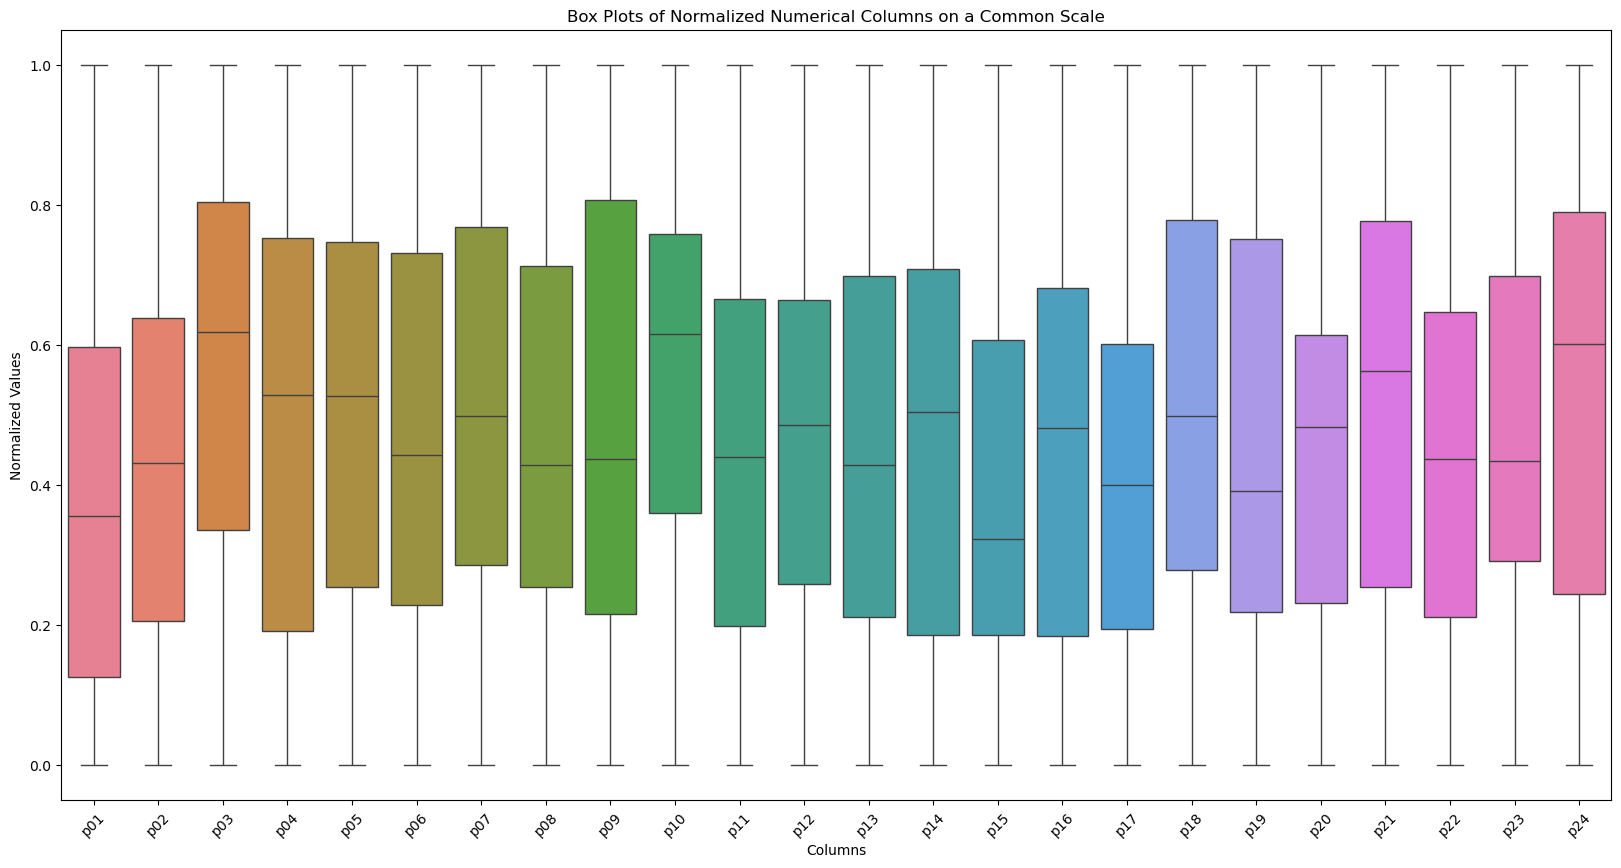

,p01,p02,p03,p04,p05,p06,p07,p08,p09,p10,...,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24
count,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,...,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000
mean,0.367272,0.427040,0.594101,0.498683,0.510658,0.484445,0.512489,0.468426,0.502359,0.572167,...,0.382702,0.452498,0.409909,0.533159,0.457959,0.447943,0.530020,0.447688,0.463170,0.537130
std,0.262768,0.267570,0.277084,0.306843,0.282177,0.278858,0.295138,0.290473,0.327508,0.282124,...,0.266434,0.282446,0.265234,0.284376,0.286247,0.246705,0.284378,0.254085,0.260191,0.306632
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.126306,0.205713,0.335275,0.190790,0.254249,0.229240,0.286162,0.253701,0.215424,0.360121,...,0.185229,0.184691,0.194280,0.278880,0.217981,0.230931,0.254526,0.211993,0.291585,0.244396
50%,0.355864,0.431122,0.619019,0.528343,0.527450,0.442590,0.498738,0.428241,0.436458,0.616006,...,0.322821,0.481946,0.399704,0.498402,0.391344,0.482252,0.562504,0.437783,0.434442,0.601148
75%,0.596662,0.638422,0.804046,0.752177,0.747492,0.731714,0.768197,0.712155,0.807751,0.758213,...,0.607057,0.681246,0.601306,0.778891,0.751722,0.614570,0.777624,0.647164,0.698917,0.790073
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
scaler = MinMaxScaler()
df_normalized = df_cleaned.copy()
df_normalized[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])


plt.figure(figsize=(20, 10))
sns.boxplot(data=df_normalized)
plt.title('Box Plots of Normalized Numerical Columns on a Common Scale')
plt.xlabel('Columns')
plt.ylabel('Normalized Values')
plt.xticks(rotation=45)
plt.show()

df_normalized.describe()

# Q 14: Logistic regression using normalized data from step/ Question 13.

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data into features (X) and target (y)
X = df_normalized.drop('Ailment', axis=1)
y = df_normalized['Ailment']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Training metrics
print('--- Training Metrics ---')
print(f'Accuracy: {accuracy_score(y_train, y_train_pred)}')
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

# Testing metrics
print('--- Testing Metrics ---')
print(f'Accuracy: {accuracy_score(y_test, y_test_pred)}')
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

--- Training Metrics ---
Accuracy: 0.9926082365364308
               precision    recall  f1-score   support

       Anemia       0.99      1.00      1.00       500
     Diabetes       1.00      1.00      1.00       435
      Healthy       0.99      1.00      0.99       449
Heart Disease       0.00      0.00      0.00        14
     Thalasse       0.99      1.00      1.00       396
     Thromboc       1.00      1.00      1.00       100

     accuracy                           0.99      1894
    macro avg       0.83      0.83      0.83      1894
 weighted avg       0.99      0.99      0.99      1894

[[500   0   0   0   0   0]
 [  0 435   0   0   0   0]
 [  0   0 449   0   0   0]
 [  4   2   6   0   2   0]
 [  0   0   0   0 396   0]
 [  0   0   0   0   0 100]]
--- Testing Metrics ---
Accuracy: 0.9873417721518988
               precision    recall  f1-score   support

       Anemia       0.98      1.00      0.99       122
     Diabetes       0.99      1.00      1.00       104
      Healt

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels wi

# Comparision of matrix form step 12 with normalized data. 

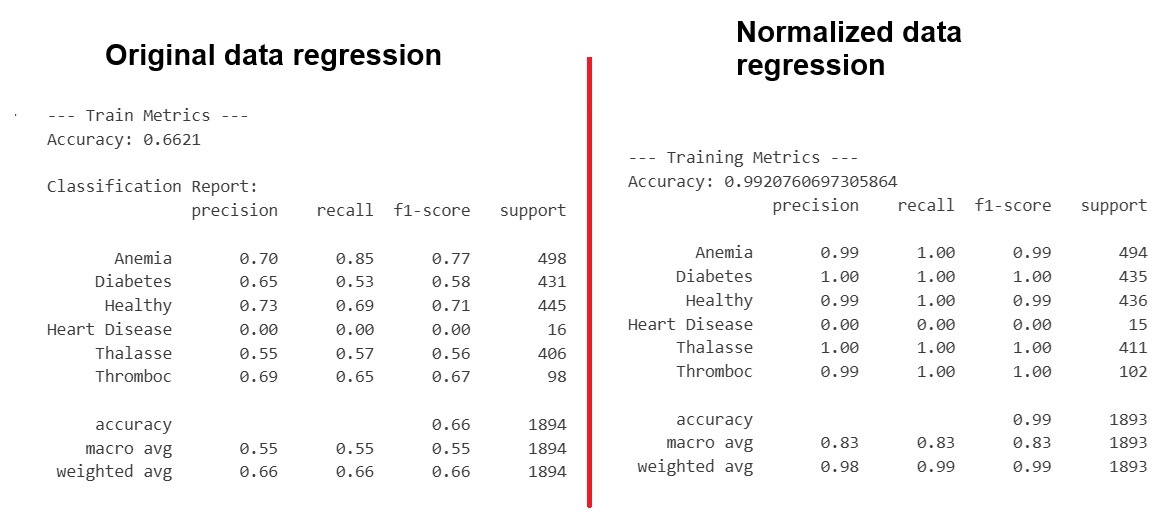
### conclusion: After normalization regression accuracy in all parameters greatly increases.

### ===== End of Exercise ===== ###